Kelompok 1: 
1. Shopi Nurhidayanti 
2. Anisa Syifa Syafaat
3. Dini Antika 
4. Dewi Sulastri
5. Muhammad Ilyasa

Dataset Stroke adalah kumpulan data yang berisi informasi tentang pasien-pasien yang didiagnosis dengan stroke. Setiap sampel dalam dataset ini memiliki beberapa fitur atau atribut yang menggambarkan karakteristik pasien, seperti usia, jenis kelamin, tekanan darah, kadar gula darah, indeks massa tubuh, dan sebagainya. Selain itu, setiap sampel juga memiliki label yang menunjukkan apakah pasien mengalami stroke atau tidak.

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
%cd "/content/drive/MyDrive/MATA KULIAH 😊😊/SEMESTER 6/PRAKTIKUM KECERDASAN BUATAN/TUGAS BESAR/Dataset"

/content/drive/MyDrive/MATA KULIAH 😊😊/SEMESTER 6/PRAKTIKUM KECERDASAN BUATAN/TUGAS BESAR/Dataset


## Import Modul

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Data Understanding

In [118]:
data = pd.read_csv('stroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [120]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [121]:
data.shape

(5110, 12)

In [122]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [123]:
data = data.drop_duplicates()
data.shape

(5110, 12)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [125]:
data.dropna(inplace = True)

In [126]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


##  Exploratory Data Analysis

In [128]:
countplot_cols = ['heart_disease', 'hypertension', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [129]:
boxplot_cols = ['age','avg_glucose_level', 'bmi']

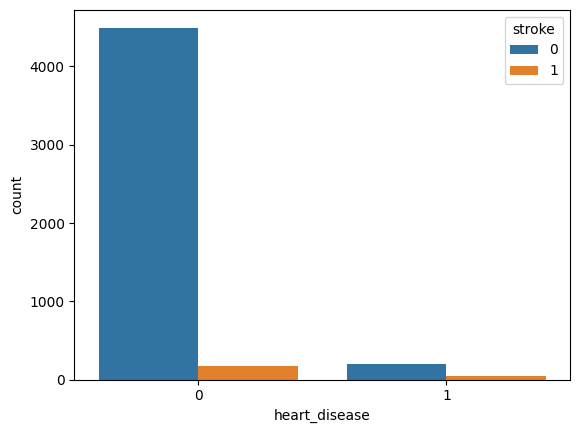

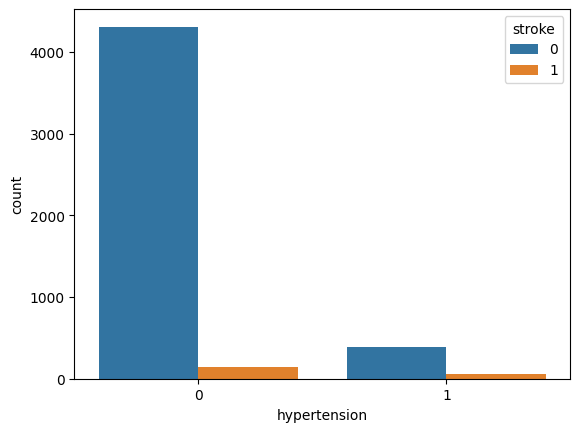

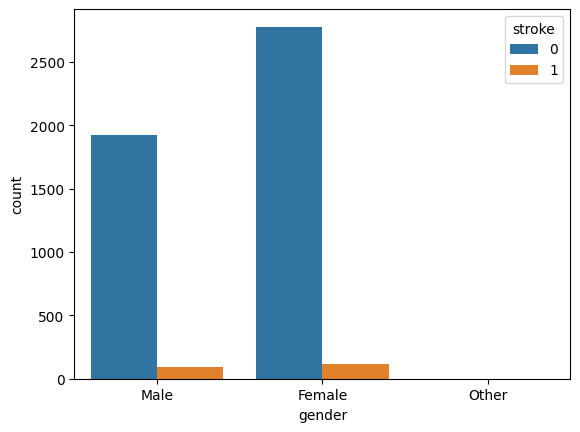

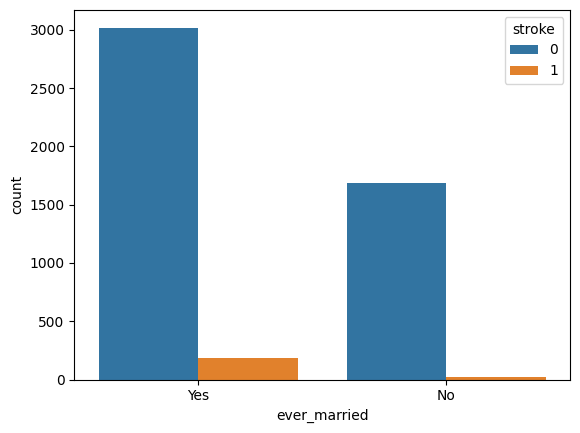

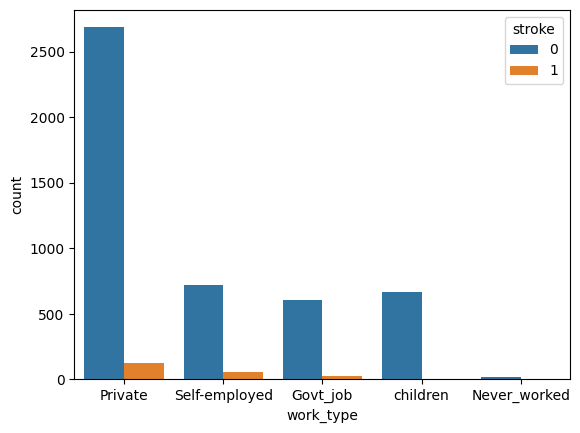

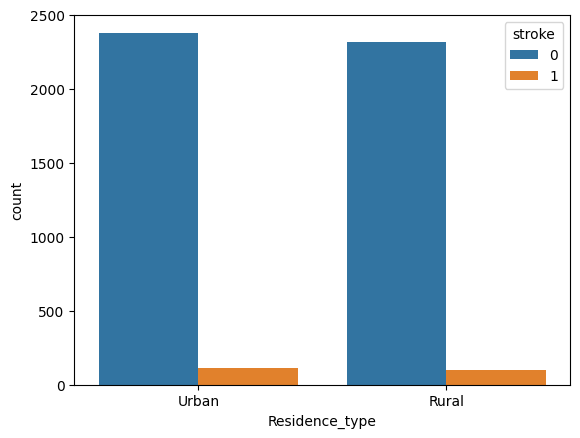

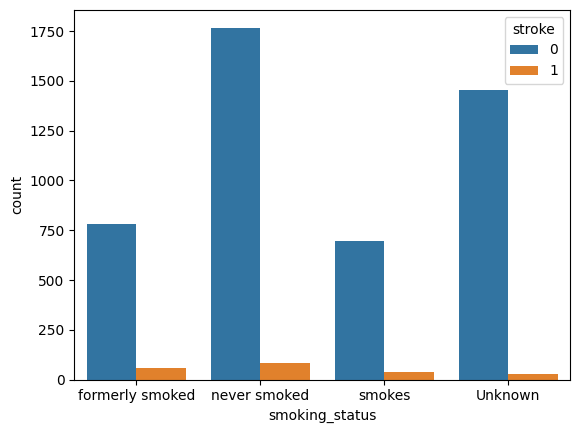

In [130]:
for i, column in enumerate(countplot_cols):
    sns.countplot(x=column, hue = 'stroke', data=data)
    plt.show()

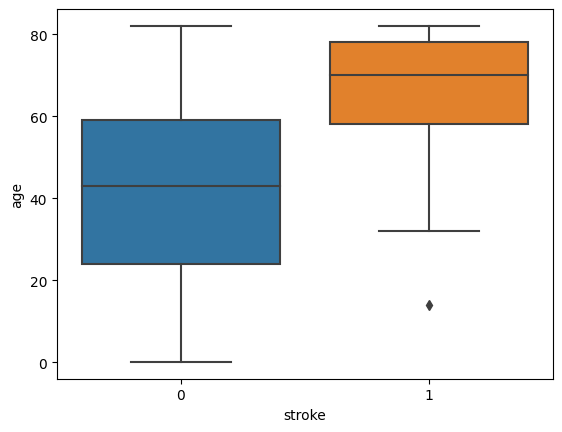

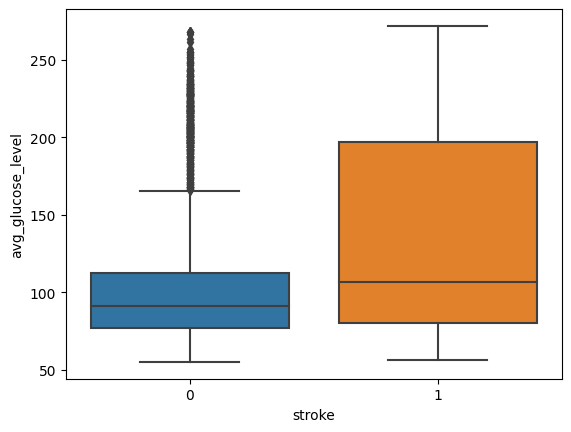

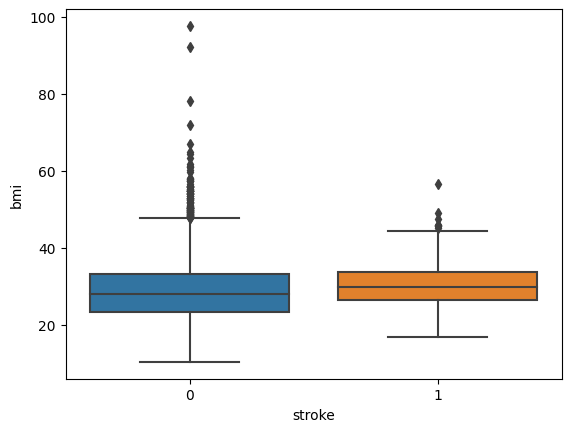

In [131]:
for i, column in enumerate(boxplot_cols):
    sns.boxplot(x='stroke', y=column, data=data)
    plt.show()

In [132]:
data = data.drop(data[data.gender == 'Other'].index)

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data = data.drop('id', axis = 1)
print('Encoding was successful ')

Encoding was successful 


In [134]:
import numpy as np
def feature_creation(data):
    data['age1'] = np.log(data['age'])
    data['age2'] = np.sqrt(data['age'])
    data['age3'] = data['age']**3
    data['bmi1'] = np.log(data['bmi'])
    data['bmi2'] = np.sqrt(data['bmi'])
    data['bmi3'] = data['bmi']**3
    data['avg_glucose_level1'] = np.log(data['avg_glucose_level'])
    data['avg_glucose_level2'] = np.sqrt(data['avg_glucose_level'])
    data['avg_glucose_level3'] = data['avg_glucose_level']**3
    for i in ['gender', 'age1', 'age2', 'age3', 'hypertension', 'heart_disease', 'ever_married', 'work_type']:
        for j in ['Residence_type', 'avg_glucose_level1','avg_glucose_level2', 'avg_glucose_level3', 'bmi1', 'bmi2', 'bmi3','smoking_status']:
            data[i+'_'+j] = data[i].astype('str')+'_'+data[j].astype('str')
    return data


In [135]:
data = feature_creation(data)

In [136]:
data.shape

(4908, 84)

In [137]:
# Determination categorical features

categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)

categorical_columns

['gender_Residence_type',
 'gender_avg_glucose_level1',
 'gender_avg_glucose_level2',
 'gender_avg_glucose_level3',
 'gender_bmi1',
 'gender_bmi2',
 'gender_bmi3',
 'gender_smoking_status',
 'age1_Residence_type',
 'age1_avg_glucose_level1',
 'age1_avg_glucose_level2',
 'age1_avg_glucose_level3',
 'age1_bmi1',
 'age1_bmi2',
 'age1_bmi3',
 'age1_smoking_status',
 'age2_Residence_type',
 'age2_avg_glucose_level1',
 'age2_avg_glucose_level2',
 'age2_avg_glucose_level3',
 'age2_bmi1',
 'age2_bmi2',
 'age2_bmi3',
 'age2_smoking_status',
 'age3_Residence_type',
 'age3_avg_glucose_level1',
 'age3_avg_glucose_level2',
 'age3_avg_glucose_level3',
 'age3_bmi1',
 'age3_bmi2',
 'age3_bmi3',
 'age3_smoking_status',
 'hypertension_Residence_type',
 'hypertension_avg_glucose_level1',
 'hypertension_avg_glucose_level2',
 'hypertension_avg_glucose_level3',
 'hypertension_bmi1',
 'hypertension_bmi2',
 'hypertension_bmi3',
 'hypertension_smoking_status',
 'heart_disease_Residence_type',
 'heart_disease_a

In [138]:
# Encoding categorical features

for col in categorical_columns:
    if col in data.columns:
        #le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
print('Encoding was successfull')

Encoding was successfull


In [139]:
#num_features_opt = 25 
num_features_opt = 40 


# the somewhat excessive number of features, which we will choose at each stage
num_features_max = 50   

features_best = []
X_train = data.drop('stroke', axis = 1).copy()
y_train = data.stroke.copy()

## Feature Selection

In [140]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

### Feature Selection with Pearson correlation

In [141]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: green'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

<ipython-input-141-1d6b69a2e1d3>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [142]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features with correlation above the threshold
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])

# Add filtered features
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  40


### Feature selection by the SelectFromModel with LinearSVC

In [143]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_selected_df = pd.DataFrame(X_new, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if model.get_support()[i]])


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Feature selection with Lasso

In [144]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=3).fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_train)
X_selected_df = pd.DataFrame(X_new, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if model.get_support()[i]])

# add features
features_best.append(X_selected_df.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

### Feature selection by the SelectKBest with Chi-2

In [145]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(abs(X_train), y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

In [146]:
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

                    Feature         Score
18       avg_glucose_level3  5.466557e+08
12                     age3  5.927941e+07
36  age2_avg_glucose_level1  2.219907e+05
28  age1_avg_glucose_level1  2.216376e+05
38  age2_avg_glucose_level3  2.207425e+05
..                      ...           ...
14                     bmi2  1.096866e+00
19    gender_Residence_type  3.541023e-01
13                     bmi1  3.030374e-01
0                    gender  1.380665e-01
6            Residence_type  8.671435e-02

[83 rows x 2 columns]


In [147]:
features_best

[['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status',
  'stroke',
  'age1',
  'bmi3',
  'gender_Residence_type',
  'gender_avg_glucose_level1',
  'gender_avg_glucose_level2',
  'gender_bmi3',
  'gender_smoking_status',
  'age3_Residence_type',
  'hypertension_Residence_type',
  'hypertension_avg_glucose_level1',
  'hypertension_avg_glucose_level2',
  'hypertension_avg_glucose_level3',
  'hypertension_bmi1',
  'hypertension_bmi3',
  'hypertension_smoking_status',
  'heart_disease_Residence_type',
  'heart_disease_avg_glucose_level1',
  'heart_disease_avg_glucose_level2',
  'heart_disease_avg_glucose_level3',
  'heart_disease_bmi1',
  'heart_disease_bmi3',
  'heart_disease_smoking_status',
  'ever_married_Residence_type',
  'ever_married_avg_glucose_level1',
  'ever_married_avg_glucose_level2',
  'ever_married_bmi3',
  'ever_married_smoking_status',
  'work_type_avg_glucose_level1

In [148]:
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
print(main_cols_max)

print('Cols:', len(main_cols_max))

['gender_Residence_type', 'age1_avg_glucose_level1', 'age3_bmi3', 'hypertension_avg_glucose_level3', 'avg_glucose_level3', 'gender_smoking_status', 'heart_disease_bmi3', 'age1_bmi1', 'heart_disease_Residence_type', 'bmi', 'age2_avg_glucose_level1', 'age3_avg_glucose_level3', 'work_type', 'hypertension_bmi3', 'age2_Residence_type', 'age1_bmi2', 'age1_avg_glucose_level2', 'age2_bmi2', 'avg_glucose_level', 'heart_disease', 'age2_bmi1', 'heart_disease_bmi2', 'heart_disease_avg_glucose_level2', 'age1_avg_glucose_level3', 'gender', 'work_type_bmi3', 'age3_bmi1', 'heart_disease_smoking_status', 'work_type_avg_glucose_level1', 'bmi3', 'hypertension', 'smoking_status', 'ever_married_bmi1', 'hypertension_avg_glucose_level2', 'age3_Residence_type', 'heart_disease_avg_glucose_level3', 'ever_married', 'hypertension_smoking_status', 'work_type_bmi1', 'work_type_avg_glucose_level2', 'ever_married_avg_glucose_level2', 'gender_avg_glucose_level1', 'age2_smoking_status', 'age3_bmi2', 'Residence_type', '

In [149]:
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
data_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
data_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
gender_avg_glucose_level1,2
ever_married_avg_glucose_level1,2
hypertension_bmi1,2
heart_disease_avg_glucose_level1,2
heart_disease_avg_glucose_level2,2
heart_disease_avg_glucose_level3,2
age,2
heart_disease_bmi1,2
hypertension_avg_glucose_level3,2
heart_disease_bmi3,2


In [150]:
# Select only our best features that are included in num_features_opt
main_cols = data_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'stroke' in main_cols:
    main_cols.append('stroke')
print(main_cols)

print("Quantity:", len(main_cols))


['age', 'avg_glucose_level', 'bmi3', 'gender_avg_glucose_level1', 'hypertension_avg_glucose_level1', 'hypertension_avg_glucose_level2', 'hypertension_avg_glucose_level3', 'hypertension_bmi1', 'hypertension_bmi3', 'heart_disease_avg_glucose_level1', 'heart_disease_avg_glucose_level2', 'heart_disease_avg_glucose_level3', 'heart_disease_bmi1', 'heart_disease_bmi3', 'ever_married_avg_glucose_level1', 'ever_married_avg_glucose_level2', 'ever_married_bmi3', 'work_type_avg_glucose_level2', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status', 'stroke', 'age1', 'age3', 'avg_glucose_level3', 'gender_Residence_type', 'gender_avg_glucose_level2', 'gender_bmi3', 'gender_smoking_status', 'age1_Residence_type', 'age1_avg_glucose_level1', 'age1_avg_glucose_level2', 'age1_avg_glucose_level3', 'age1_bmi1', 'age1_bmi2']
Quantity: 40


In [151]:
data[main_cols].head()

,age,avg_glucose_level,bmi3,gender_avg_glucose_level1,hypertension_avg_glucose_level1,hypertension_avg_glucose_level2,hypertension_avg_glucose_level3,hypertension_bmi1,hypertension_bmi3,heart_disease_avg_glucose_level1,...,gender_Residence_type,gender_avg_glucose_level2,gender_bmi3,gender_smoking_status,age1_Residence_type,age1_avg_glucose_level1,age1_avg_glucose_level2,age1_avg_glucose_level3,age1_bmi1,age1_bmi2
0,67.0,228.69,49027.896,4252,3443,1365,330,239,261,3905,...,3,3213,592,5,175,4097,4072,4063,3560,3560
2,80.0,105.92,34328.125,3641,2305,227,317,198,200,3802,...,2,2602,533,6,200,4749,4714,4716,4135,4135
3,49.0,171.23,40707.584,2197,3129,1051,2256,217,229,3223,...,1,700,220,3,139,2802,2758,2790,2440,2440
4,79.0,174.12,13824.000,2203,3830,3628,3798,429,423,3232,...,0,706,59,2,198,4693,4643,4677,4043,4043
5,81.0,186.21,24389.000,4074,3166,1088,2687,163,147,3278,...,3,3035,487,5,203,4825,4788,4820,4178,4178


## Balance with SMOTE

In [152]:
X = data[main_cols].drop('stroke', axis = 1)
y = data[main_cols].stroke

In [153]:
#scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

X_rs = pd.DataFrame(rs.fit_transform(X), columns = X.columns)

In [154]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rs, y, test_size=0.2, random_state=42)

In [155]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

0    3770
1    3770
Name: stroke, dtype: int64


## Modeling

## Decision Tree

In [170]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
# Buat Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Latih Decision Tree Classifier
decision_tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [171]:
# Predict the labels for the test set using the combined model
y_pred_dt = decision_tree.predict(X_test)

# Membuat laporan klasifikasi
classification_dt = classification_report(y_test,y_pred_dt)

# Calculate the accuracy of the combined model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Menampilkan laporan klasifikasi
print(classification_dt)

Accuracy: 0.8971486761710794
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       929
           1       0.12      0.15      0.14        53

    accuracy                           0.90       982
   macro avg       0.54      0.55      0.54       982
weighted avg       0.91      0.90      0.90       982



## Adaboost

In [172]:
from sklearn.ensemble import AdaBoostClassifier

# Membuat model Adaboost
adaboost = AdaBoostClassifier(random_state=42)

# Melatih model Adaboost dengan data yang telah di-sampling menggunakan metode "ACTUAL SMOTE"
adaboost.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(random_state=42)

In [176]:
# Predict the labels for the test set using the combined model
y_pred2 = adaboost.predict(X_test)

# Membuat laporan klasifikasi
classification_rep2 = classification_report(y_test, y_pred2)

# Calculate the accuracy of the combined model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

# Menampilkan laporan klasifikasi
print(classification_rep2)

Accuracy: 0.9022403258655805
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.14      0.15      0.14        53

    accuracy                           0.90       982
   macro avg       0.54      0.55      0.55       982
weighted avg       0.91      0.90      0.90       982



## C45 & Adaboost

In [177]:
from sklearn.tree import DecisionTreeClassifier
# Create a C4.5 decision tree classifier
c45 = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the C4.5 decision tree
c45.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [189]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# Create an AdaBoost classifier with the C4.5 decision tree as the base estimator
adaboost = AdaBoostClassifier(base_estimator=c45, random_state=42)

# Perform cross-validation with 5 folds
scores = cross_val_score(adaboost, X_train_sm, y_train_sm, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [190]:
# Print the accuracy scores from cross-validation
print("Cross-Validation Accuracy Scores:", scores)

# Print the mean accuracy and standard deviation of the scores
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy Scores: [0.90649867 0.95225464 0.94827586 0.94297082 0.95689655]
Mean Accuracy: 0.94 (+/- 0.04)


In [191]:
# Obtain cross-validated predictions
y_pred_cv = cross_val_predict(adaboost, X_train_sm, y_train_sm, cv=5)

# Generate classification report
report = classification_report(y_train_sm, y_pred_cv)

# Print the classification report
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3770
           1       0.93      0.95      0.94      3770

    accuracy                           0.94      7540
   macro avg       0.94      0.94      0.94      7540
weighted avg       0.94      0.94      0.94      7540

